In [1]:
# Load a 3D dose distrubution

In [2]:
path_to_file = "/media/luis/A528-D50C/Hombro20en1/RD_3D_arc1y2.dcm"

In [ ]:
from Dosepy.image import load

img = load(path_to_file)  # Shows an exception. Dosepy is intended for 2D dose distributions

Exception: The DICOM file must have 2D dose distribution.

SimpleITK should be a better approach to work with dose distributions and structures.

In [1]:
import SimpleITK as sitk

In [29]:
img = sitk.ReadImage(path_to_file, outputPixelType=sitk.sitkFloat64)

In [30]:
print(img.GetPixelIDValue())
print(img.GetPixelIDTypeAsString())
print(img.GetNumberOfComponentsPerPixel())

9
64-bit float
1


In [31]:
img.GetSize()

(102, 90, 60)

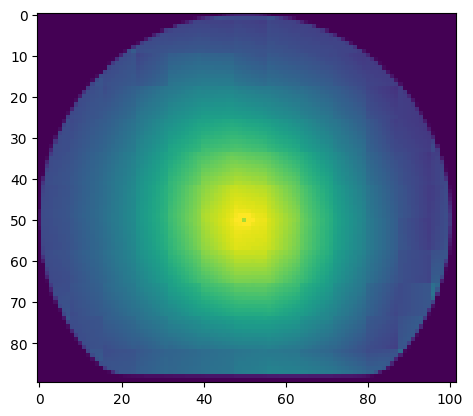

In [32]:
import matplotlib.pyplot as plt

plt.imshow(sitk.GetArrayViewFromImage(img[:,:,50]), vmax=12000)

In [33]:
import numpy as np

np.mean(sitk.GetArrayFromImage(img[50,:,:]))

np.float64(81198.36425925927)

(array([1892.,  430., 2106., 1435., 1077.,  745.,  576.,  444.,  334.,
         141.]),
 array([    0. ,  1233.3,  2466.6,  3699.9,  4933.2,  6166.5,  7399.8,
         8633.1,  9866.4, 11099.7, 12333. ]),
 <BarContainer object of 10 artists>)

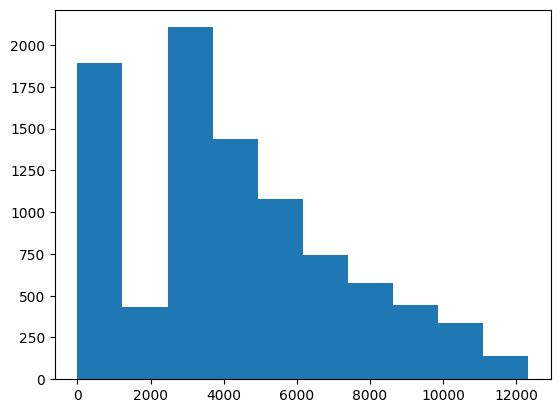

In [34]:
plt.hist(np.ravel(sitk.GetArrayFromImage(img[:,:,50])))

SimpleITK does not calculate the product with DoseGridScaling tag

In [ ]:
#img.GetMetaData("DoseGridScaling")
img.GetMetaDataKeys()

('0008|0005',
 '0008|0012',
 '0008|0013',
 '0008|0016',
 '0008|0018',
 '0008|0020',
 '0008|0021',
 '0008|0023',
 '0008|0030',
 '0008|0031',
 '0008|0033',
 '0008|0050',
 '0008|0060',
 '0008|0070',
 '0008|0080',
 '0008|0090',
 '0008|1010',
 '0008|1030',
 '0008|103e',
 '0008|1040',
 '0008|1048',
 '0008|1070',
 '0008|1090',
 '0010|0010',
 '0010|0020',
 '0010|0030',
 '0010|0032',
 '0010|0040',
 '0018|0050',
 '0018|1000',
 '0018|1020',
 '0020|000d',
 '0020|000e',
 '0020|0010',
 '0020|0011',
 '0020|0032',
 '0020|0037',
 '0020|0052',
 '0020|1040',
 '0028|0002',
 '0028|0004',
 '0028|0008',
 '0028|0009',
 '0028|0010',
 '0028|0011',
 '0028|0030',
 '0028|0100',
 '0028|0101',
 '0028|0102',
 '0028|0103',
 '3004|0002',
 '3004|0004',
 '3004|000a',
 '3004|000c',
 '3004|000e',
 'ITK_original_direction',
 'ITK_original_spacing')

In [21]:
img.GetMetaData('3004|000e')

'1.296932754e-05 '

In [35]:
dose = img * float(img.GetMetaData('3004|000e'))

(array([3432., 3584., 1255.,  398.,  165.,   92.,   65.,   53.,   60.,
          76.]),
 array([ 0.        ,  1.34627586,  2.69255172,  4.03882757,  5.38510343,
         6.73137929,  8.07765515,  9.423931  , 10.77020686, 12.11648272,
        13.46275858]),
 <BarContainer object of 10 artists>)

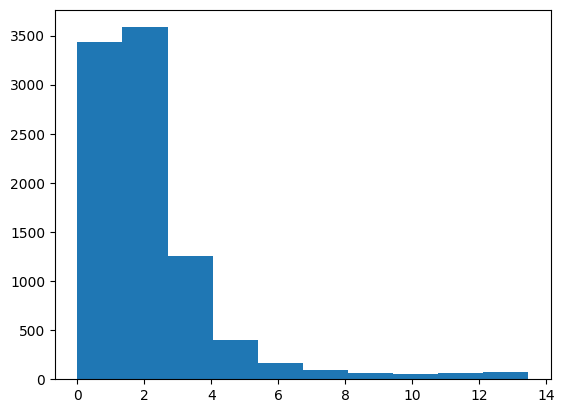

In [47]:
plt.hist(np.ravel(sitk.GetArrayFromImage(dose[:,:,30])))

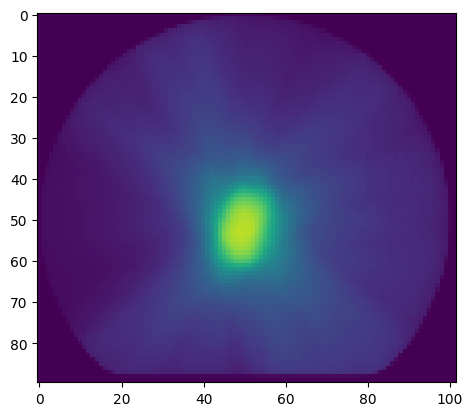

In [48]:
plt.imshow(sitk.GetArrayViewFromImage(dose[:,:,30]), vmax=15)

In [ ]:
from pathlib import Path


def load(path_to_file: str | Path):
    """
    Load a dose distribution from a DICOM file.

    Parameters
    ----------
    path_to_file : str or Path
        The path to the DICOM file containing the dose distribution.

    Returns
    -------
    sitk.Image
        A SimpleITK image object representing the dose distribution.
        
    """

    # Check if the input is a string or Path object
    if not isinstance(path_to_file, (str, Path)):
        raise TypeError("path_to_file must be a string or a Path object.")

    # Convert str to Path if necessary
    if isinstance(path_to_file, str):
        path_to_file = Path(path_to_file)

    # Check if the file exists
    if not path_to_file.is_file():
        raise FileNotFoundError(f"The file {path_to_file} does not exist.")

    # Check if the file is DICOM file
    with open(path_to_file, "rb") as my_file:
        my_file.read(128)  # Skip first bytes

        if my_file.read(4) != b'DICM':
            print(f"{path_to_file} is not a valid dcm file.")
            raise ValueError(f"{path_to_file} is not a valid dcm file.")
        
        
    # Load the DICOM file using SimpleITK
    img = sitk.ReadImage(str(path_to_file), outputPixelType=sitk.sitkFloat64)

    # Check if the tag '3004|000e' exists in the metadata
    if not img.HasMetaDataKey('3004|000e'):
        raise ValueError(f"The DICOM file {path_to_file} does not contain the required metadata tag DoseGridScaling (3004|000e).")

    # Convert image to a dose distribution
    dose = img * float(img.GetMetaData('3004|000e'))

    return dose


In [50]:
with open(path_to_file, "rb") as my_file:
    my_file.read(128)
    print(my_file.read(4))

b'DICM'


In [54]:
load(path_to_file=path_to_file)

/media/luis/A528-D50C/Hombro20en1/RD_3D_arc1y2.dcm is a valid dcm file.


In [56]:
# Check if path_to_file is an instance of Path
if isinstance(path_to_file, Path):
    print(f"{path_to_file} is a Path object.")